In [1]:
# !pip install --upgrade google-cloud-bigquery

## Setup Google Cloud Storage Database and Download Data

In [27]:
import pandas as pd

In [1]:
from google.cloud import bigquery
from google.oauth2 import service_account
credentials = service_account.Credentials.from_service_account_file('/home/mattreex/gcp_red_auth.json')

project_id = 'redditml-project'
client = bigquery.Client(credentials= credentials,project=project_id)

## Create dataset

In [15]:
dataset = bigquery.Dataset("redditml-project.reddit")

# TODO(developer): Specify the geographic location where the dataset should reside.
dataset.location = "US"

# Send the dataset to the API for creation, with an explicit timeout.
# Raises google.api_core.exceptions.Conflict if the Dataset already
# exists within the project.
dataset = client.create_dataset(dataset, timeout=30)  # Make an API request.
print("Created dataset {}.{}".format(client.project, dataset.dataset_id))

Created dataset redditml-project.reddit


In [20]:
dataset = bigquery.Dataset("redditml-project.reddit_posts")

# TODO(developer): Specify the geographic location where the dataset should reside.
dataset.location = "US"

# Send the dataset to the API for creation, with an explicit timeout.
# Raises google.api_core.exceptions.Conflict if the Dataset already
# exists within the project.
dataset = client.create_dataset(dataset, timeout=30)  # Make an API request.
print("Created dataset {}.{}".format(client.project, dataset.dataset_id))

Created dataset redditml-project.reddit_posts


In [8]:
from google.cloud import bigquery


datasets = list(client.list_datasets())  # Make an API request.
project = client.project

if datasets:
    print("Datasets in project {}:".format(project))
    for dataset in datasets:
        print("\t{}".format(dataset.dataset_id))
else:
    print("{} project does not contain any datasets.".format(project))

Datasets in project redditml-project:
	reddit
	reddit_posts


In [12]:
datasets = list(client.list_datasets())

In [10]:
tables = client.list_tables('redditml-project.reddit_posts')  # Make an API request.

for table in tables:
    print("{}.{}.{}".format(table.project, table.dataset_id, table.table_id))

redditml-project.reddit_posts.2015_12
redditml-project.reddit_posts.2016_01
redditml-project.reddit_posts.2016_02
redditml-project.reddit_posts.2016_03
redditml-project.reddit_posts.2016_04
redditml-project.reddit_posts.2016_05
redditml-project.reddit_posts.2016_06
redditml-project.reddit_posts.2016_07
redditml-project.reddit_posts.2016_08
redditml-project.reddit_posts.2016_09
redditml-project.reddit_posts.2016_10
redditml-project.reddit_posts.2016_11
redditml-project.reddit_posts.2016_12
redditml-project.reddit_posts.2017_01
redditml-project.reddit_posts.2017_02
redditml-project.reddit_posts.2017_03
redditml-project.reddit_posts.2017_04
redditml-project.reddit_posts.2017_05
redditml-project.reddit_posts.2017_06
redditml-project.reddit_posts.2017_07
redditml-project.reddit_posts.2017_08
redditml-project.reddit_posts.2017_09
redditml-project.reddit_posts.2017_10
redditml-project.reddit_posts.2017_11
redditml-project.reddit_posts.2017_12
redditml-project.reddit_posts.2018_01
redditml-pro

In [19]:
tables = client.list_tables('redditml-project.reddit')  # Make an API request.

for table in tables:
    print("{}.{}.{}".format(table.project, table.dataset_id, table.table_id))

redditml-project.reddit.2005
redditml-project.reddit.2006
redditml-project.reddit.2007
redditml-project.reddit.2008
redditml-project.reddit.2009
redditml-project.reddit.2010
redditml-project.reddit.2011
redditml-project.reddit.2012
redditml-project.reddit.2013
redditml-project.reddit.2014
redditml-project.reddit.2015_01
redditml-project.reddit.2015_02
redditml-project.reddit.2015_03
redditml-project.reddit.2015_04
redditml-project.reddit.2015_05
redditml-project.reddit.2015_06
redditml-project.reddit.2015_07
redditml-project.reddit.2015_08
redditml-project.reddit.2015_09
redditml-project.reddit.2015_10
redditml-project.reddit.2015_11
redditml-project.reddit.2015_12
redditml-project.reddit.2016_01
redditml-project.reddit.2016_02
redditml-project.reddit.2016_03
redditml-project.reddit.2016_04
redditml-project.reddit.2016_05
redditml-project.reddit.2016_06
redditml-project.reddit.2016_07
redditml-project.reddit.2016_08
redditml-project.reddit.2016_09
redditml-project.reddit.2016_10
reddit

## Download Posts

In [31]:
all_posts = pd.DataFrame()

In [32]:
for i in range(1,9):
    query_job = client.query(f"""
          SELECT * FROM `redditml-project.reddit_posts.2019_0{i}` 
where subreddit='AskHistorians'""")
    results = query_job.result()
    res_df = results.to_dataframe()
    all_posts = pd.concat([all_posts, res_df])

/home/mattreex/.virtenvs/reddit_proj/lib/python3.8/site-packages/google/cloud/bigquery/client.py:444: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  warnings.warn(


In [34]:

for i in range(1,10):
    query_job = client.query(f"""
          SELECT * FROM `redditml-project.reddit_posts.2018_0{i}` 
where subreddit='AskHistorians'""")
    results = query_job.result()
    res_df = results.to_dataframe()
    all_posts = pd.concat([all_posts, res_df]) 
    
    query_job = client.query(f"""
          SELECT * FROM `redditml-project.reddit_posts.2017_0{i}` 
where subreddit='AskHistorians'""")
    results = query_job.result()
    res_df = results.to_dataframe()
    all_posts = pd.concat([all_posts, res_df]) 
    
    query_job = client.query(f"""
          SELECT * FROM `redditml-project.reddit_posts.2016_0{i}` 
where subreddit='AskHistorians'""")
    results = query_job.result()
    res_df = results.to_dataframe()
    all_posts = pd.concat([all_posts, res_df])    

    
for i in range(10,13):
    query_job = client.query(f"""
          SELECT * FROM `redditml-project.reddit_posts.2018_{i}` 
where subreddit='AskHistorians'""")
    results = query_job.result()
    res_df = results.to_dataframe()
    all_posts = pd.concat([all_posts, res_df])   
    
    query_job = client.query(f"""
          SELECT * FROM `redditml-project.reddit_posts.2017_{i}` 
where subreddit='AskHistorians'""")
    results = query_job.result()
    res_df = results.to_dataframe()
    all_posts = pd.concat([all_posts, res_df])    
    
    query_job = client.query(f"""
          SELECT * FROM `redditml-project.reddit_posts.2016_{i}` 
where subreddit='AskHistorians'""")
    results = query_job.result()
    res_df = results.to_dataframe()
    all_posts = pd.concat([all_posts, res_df])  
    
all_posts.to_csv(f'./AskHist_posts_2016_01-2019_08', sep='\t')

In [ ]:
all_posts = None

## Download comments

In [35]:
all_comments = pd.DataFrame()

In [36]:
for i in range(1,9):
    query_job = client.query(f"""
          SELECT * FROM `redditml-project.reddit.2019_0{i}` 
where subreddit='AskHistorians'""")
    results = query_job.result()
    res_df = results.to_dataframe()
    all_comments = pd.concat([all_comments, res_df])
    

In [37]:

for i in range(1,10):
    query_job = client.query(f"""
          SELECT * FROM `redditml-project.reddit.2018_0{i}` 
where subreddit='AskHistorians'""")
    results = query_job.result()
    res_df = results.to_dataframe()
    all_comments = pd.concat([all_comments, res_df])
    
    query_job = client.query(f"""
          SELECT * FROM `redditml-project.reddit.2017_0{i}` 
where subreddit='AskHistorians'""")
    results = query_job.result()
    res_df = results.to_dataframe()
    all_comments = pd.concat([all_comments, res_df])
    
    query_job = client.query(f"""
          SELECT * FROM `redditml-project.reddit.2016_0{i}` 
where subreddit='AskHistorians'""")
    results = query_job.result()
    res_df = results.to_dataframe()
    all_comments = pd.concat([all_comments, res_df])
    

    
for i in range(10,13):
    query_job = client.query(f"""
          SELECT * FROM `redditml-project.reddit.2018_{i}` 
where subreddit='AskHistorians'""")
    results = query_job.result()
    res_df = results.to_dataframe()
    all_comments = pd.concat([all_comments, res_df])
    
    query_job = client.query(f"""
          SELECT * FROM `redditml-project.reddit.2017_{i}` 
where subreddit='AskHistorians'""")
    results = query_job.result()
    res_df = results.to_dataframe()
    all_comments = pd.concat([all_comments, res_df])
    
    query_job = client.query(f"""
          SELECT * FROM `redditml-project.reddit.2016_{i}` 
where subreddit='AskHistorians'""")
    results = query_job.result()
    res_df = results.to_dataframe()
    all_comments = pd.concat([all_comments, res_df])

all_comments.to_csv(f'./AskHist_comment_2016_01-2019_08', sep='\t')

## Create Local Dataset

In [1]:
import pandas as pd
from utils import clean_text, tokenize_text

In [2]:
posts = pd.read_csv('./AskHist_posts_2016_01-2019_08', sep='\t', index_col=0)
comments = pd.read_csv('./AskHist_comment_2016_01-2019_08', sep='\t', index_col=0)

/home/mattreex/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,1,6,8,9,12,14,15,17,18,19,22,25,26,29,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/mattreex/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,2,3,4,8,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215426 entries, 0 to 4815
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_utc             215424 non-null  object 
 1   subreddit               215424 non-null  object 
 2   author                  215421 non-null  object 
 3   domain                  215363 non-null  object 
 4   url                     215421 non-null  object 
 5   num_comments            215424 non-null  object 
 6   score                   215424 non-null  float64
 7   ups                     67355 non-null   object 
 8   downs                   67355 non-null   object 
 9   title                   215424 non-null  object 
 10  selftext                169039 non-null  object 
 11  saved                   67349 non-null   object 
 12  id                      215418 non-null  object 
 13  from_kind               3 non-null       object 
 14  gilded                  215

In [4]:
# extract submission id from comment
df = comments['link_id'].str.split('_', expand=True)
comments['link_id'] = df[1]

In [5]:
data = posts.merge(comments, how='inner', left_on='id', right_on='link_id')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724271 entries, 0 to 724270
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   created_utc_x             724247 non-null  object 
 1   subreddit_x               724247 non-null  object 
 2   author_x                  724211 non-null  object 
 3   domain                    724153 non-null  object 
 4   url                       724211 non-null  object 
 5   num_comments              724247 non-null  object 
 6   score_x                   724247 non-null  float64
 7   ups_x                     253933 non-null  object 
 8   downs_x                   253933 non-null  object 
 9   title                     724247 non-null  object 
 10  selftext                  512595 non-null  object 
 11  saved                     253861 non-null  object 
 12  id_x                      724175 non-null  object 
 13  from_kind                 36 non-null      o

In [6]:
# restrict data
data_clean = data[['id_x', 'num_comments', 'url', 'title','selftext', 'permalink', 'body']]

In [7]:
# skip data that has only 1 comment (moderator comment)
data_clean['num_comments'] = data_clean['num_comments'].replace('False', float('nan'))
data_clean = data_clean[data_clean['num_comments'].notnull()]
data_clean = data_clean[data_clean['num_comments'].astype(int) > 1]

<ipython-input-7-a65edec669e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['num_comments'] = data_clean['num_comments'].replace('False', float('nan'))


In [8]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663779 entries, 0 to 724265
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id_x          663743 non-null  object
 1   num_comments  663779 non-null  object
 2   url           663779 non-null  object
 3   title         663779 non-null  object
 4   selftext      462761 non-null  object
 5   permalink     663743 non-null  object
 6   body          663765 non-null  object
dtypes: object(7)
memory usage: 40.5+ MB


In [9]:
data_clean.head()

,id_x,num_comments,url,title,selftext,permalink,body
0,af2bwd,3,https://www.reddit.com/r/AskHistorians/comment...,Why was a Jewish state in Palestine establishe...,"If my understanding is correct, there were num...",/r/AskHistorians/comments/af2bwd/why_was_a_jew...,You are making quite a leap from the Crusades ...
1,af2bwd,3,https://www.reddit.com/r/AskHistorians/comment...,Why was a Jewish state in Palestine establishe...,"If my understanding is correct, there were num...",/r/AskHistorians/comments/af2bwd/why_was_a_jew...,[removed]
2,af2bwd,3,https://www.reddit.com/r/AskHistorians/comment...,Why was a Jewish state in Palestine establishe...,"If my understanding is correct, there were num...",/r/AskHistorians/comments/af2bwd/why_was_a_jew...,[removed]
3,af2vbr,2,https://www.reddit.com/r/AskHistorians/comment...,Where can I find a (translated) primary source...,Not much more to say than what is in the title...,/r/AskHistorians/comments/af2vbr/where_can_i_f...,I thought at first you had got the story a bit...
4,af2vbr,2,https://www.reddit.com/r/AskHistorians/comment...,Where can I find a (translated) primary source...,Not much more to say than what is in the title...,/r/AskHistorians/comments/af2vbr/where_can_i_f...,Thank you very much for tracking this down. \...


In [16]:
import math
def accumulate_comments(data):    
    data_dict = {}
    for row in data.index:
        if type(data.loc[row]['permalink']) != str:
            continue
        link =  data.loc[row]['permalink'].replace("/", "()")
        if not data_dict.get(link):
            title = clean_text(data.loc[row]['title'])
            tb = clean_text(data.loc[row]['selftext']) 
            body = clean_text(data.loc[row]['body'])
            text = title + " " + tb + " " + body
            tokenized_text = " ".join(tokenize_text(text)) 
            data_dict[link] = tokenized_text

        else:
            body = clean_text(data.loc[row]['body'])
            tokenized_text = " ".join(tokenize_text(body)) 
            data_dict[link] = data_dict[link] + " " + tokenized_text
    return data_dict

In [13]:
import os
def write_to_blocks(data_dict, block_size):
    cnt = 0
    i = 0
    for name, text in data_dict.items():
        
        if cnt == block_size:
            print(f"finished with block {i}")
            i += 1
            cnt = 0
        try: 
            os.mkdir(f"docs/{i}")
        except FileExistsError:
            pass
        with open(f"docs/{i}/{name}", 'w') as f:
            f.write(text)
        cnt += 1

In [14]:
try: 
    os.mkdir("docs/")
except FileExistsError:
    pass

In [17]:
datadict = accumulate_comments(data_clean)


In [18]:
write_to_blocks(datadict, 1000)

finished with block 0
finished with block 1
finished with block 2
finished with block 3
finished with block 4
finished with block 5
finished with block 6
finished with block 7
finished with block 8
finished with block 9
finished with block 10
finished with block 11
finished with block 12
finished with block 13
finished with block 14
finished with block 15
finished with block 16
finished with block 17
finished with block 18
finished with block 19
finished with block 20
finished with block 21
finished with block 22
finished with block 23
finished with block 24
finished with block 25
finished with block 26
finished with block 27
finished with block 28
finished with block 29
finished with block 30
finished with block 31
finished with block 32
finished with block 33
finished with block 34
finished with block 35
finished with block 36
finished with block 37
finished with block 38
finished with block 39
finished with block 40
finished with block 41
finished with block 42
finished with block 4

## Create Block Sorted-based Index

In [18]:
import BSBI
import os
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
try: 
    os.mkdir('output_dir_compressed')
except FileExistsError:
    pass

In [3]:
BSBI_instance_compressed = BSBI.BSBIIndex(data_dir='docs', output_dir = 'output_dir_compressed', index_name='reddit')
# BSBI_instance_compressed.index()


## Query Index

In [4]:
q = "ancient rome"
BSBI_instance_compressed.tfidf_retrieve(q)

['reddit.com/r/AskHistorians/comments/69gw2v/im_a_roman_emperor_ruling_in_rome_the_persians/',
 'reddit.com/r/AskHistorians/comments/45jigs/where_did_the_ancient_greek_culture_go/',
 'reddit.com/r/AskHistorians/comments/818sam/why_did_spains_latin_american_colonies_not_join/',
 'reddit.com/r/AskHistorians/comments/anax4d/the_roman_poet_ovid_hated_being_exiled_to_the/',
 'reddit.com/r/AskHistorians/comments/cxirkz/im_a_roman_senator_in_rome_in_476_ce_the_last/',
 'reddit.com/r/AskHistorians/comments/434y71/how_were_the_romans_able_to_field_thousands_of/',
 'reddit.com/r/AskHistorians/comments/ajxspw/why_have_jews_been_at_the_receiving_end_so_many/',
 'reddit.com/r/AskHistorians/comments/628cxk/howwhy_was_the_sabbath_changed_from_saturday_to/',
 'reddit.com/r/AskHistorians/comments/5o7rql/did_the_romans_have_any_laws_regarding_same_sex/',
 'reddit.com/r/AskHistorians/comments/4gz1ui/as_the_emperors_bodyguards_what_did_the_varangian/']

In [6]:
rome_relevant = [1,1,0,1,1,1,0,0,1,1]

In [5]:
q = "American Civil War"
BSBI_instance_compressed.tfidf_retrieve(q)

['reddit.com/r/AskHistorians/comments/5r94bn/how_did_people_carry_around_polearms_around_the/',
 'reddit.com/r/AskHistorians/comments/ajss92/in_1833_the_british_govt_took_a_loan_from_the/',
 'reddit.com/r/AskHistorians/comments/akpwo7/what_happened_to_the_algerian_french_french/',
 'reddit.com/r/AskHistorians/comments/aci07x/were_there_any_more_groups_of_german_soldiers_who/',
 'reddit.com/r/AskHistorians/comments/5n57kp/its_1935_im_mexican_and_i_walk_into_a_segregated/',
 'reddit.com/r/AskHistorians/comments/cr7mj9/did_the_second_sinojapanese_war_where_the_chinese/',
 'reddit.com/r/AskHistorians/comments/ak9350/was_any_diplomatic_efforts_to_expand_the_maginot/',
 'reddit.com/r/AskHistorians/comments/7oar9z/did_america_give_planes_to_britain_in_1940_by/',
 'reddit.com/r/AskHistorians/comments/7psqss/was_there_a_war_between_wealthy_people_and_the/',
 'reddit.com/r/AskHistorians/comments/c78mhi/what_would_a_standard_issue_medieval_sword_look/']

In [7]:
civil_relevant = [0,0,0,0,0,0,0,0,0,0]

In [12]:
q = "Viking homeland"
BSBI_instance_compressed.tfidf_retrieve(q)

['reddit.com/r/AskHistorians/comments/codips/did_the_scandinavian_people_know_about_vinland/',
 'reddit.com/r/AskHistorians/comments/ae9sgq/in_norse_society_if_a_warrior_was_wounded_in/',
 'reddit.com/r/AskHistorians/comments/ally5h/why_did_philip_never_take_sparta/',
 'reddit.com/r/AskHistorians/comments/canixo/how_true_is_the_belief_that_latinos_have_arabic/',
 'reddit.com/r/AskHistorians/comments/ak0dm1/broad_question_what_can_people_tell_me_of_early/',
 'reddit.com/r/AskHistorians/comments/af2bwd/why_was_a_jewish_state_in_palestine_established/',
 'reddit.com/r/AskHistorians/comments/agtjvh/how_accurate_is_the_interpretation_that_the_us/',
 'reddit.com/r/AskHistorians/comments/agn62d/why_did_the_pope_move_to_avignon/',
 'reddit.com/r/AskHistorians/comments/crcefq/during_the_viking_age_how_common_was_it_for_danes/',
 'reddit.com/r/AskHistorians/comments/cjrikw/tuesday_trivia_femme_fatales_this_thread_has/']

In [13]:
viking_relevant = [1,1,0,0,1,0,0,0,1,0]

## Evaluation

In [8]:

def compute_precision(vals):
    precision_vals = []
    for i in range(10):
        tp = sum(vals[:i+1])
        fp = 10-tp
        precision = tp/(tp +fp)
        precision_vals.append(precision)
    return precision_vals  

In [14]:
rome = compute_precision(rome_relevant)

In [15]:
civil = compute_precision(civil_relevant)

In [16]:
viking = compute_precision(viking_relevant)

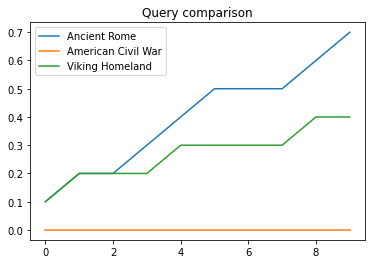

In [20]:
plt.plot(range(0,10), rome, label='Ancient Rome')
plt.plot(range(0,10), civil, label='American Civil War')
plt.plot(range(0,10), viking, label='Viking Homeland')
plt.title("Query comparison")
plt.legend()
plt.show()